# Roy

This is for me to test around and write some functions out for the class, you can create your own notebook and test around if needed. The main notebook will be `StatArb.ipynb`.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.decomposition import PCA
from Factors import Factors
from StatArbStrategy import StatArbStrategy
from Trade import Trade

In [2]:
start="2021-09-26 00:00:00"
finish="2021-09-27 00:00:00"

In [3]:
trading_signals = {}
hourly_returns = {}

In [4]:
date_range = pd.date_range(start, finish, freq='H')
date_range.shape

(25,)

In [5]:
for d in date_range:
    start_time = d
    arb = StatArbStrategy(window=240, start=d, finish=finish)

    params = arb.get_params()
    s = arb.get_s_score(params)

    # get trading signals with a certain start time and their returns
    trading_signals[start_time] = arb.generate_trading_signals(s)
    # hourly_returns[start_time] = arb.hourly_returns

In [6]:
trading_signals = pd.DataFrame.from_dict(trading_signals, orient='index')
trading_signals

,BTC,BNB,XRP,SOL,DOGE,LINK,UNI,LTC,BCH,MATIC,...,AUDIO,BNT,ZRX,DYDX,RAY,PERP,SAND,C98,CRO,HNT
2021-09-26 00:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CSP,...,BTO,STO,CSP,CSP,CSP,CSP,CSP,CSP,NaN,NaN
2021-09-26 01:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CSP,...,CSP,STO,CSP,CSP,CSP,CLP,CSP,CSP,NaN,NaN
2021-09-26 02:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CSP,...,BTO,CLP,CSP,CSP,CSP,CLP,CSP,CSP,NaN,NaN
2021-09-26 03:00:00,CSP,CSP,CLP,CSP,CSP,STO,CLP,CSP,CSP,STO,...,BTO,CLP,CSP,CSP,CSP,CLP,CSP,CSP,NaN,NaN
2021-09-26 04:00:00,CSP,CSP,CLP,CSP,CSP,STO,CLP,STO,CSP,CLP,...,BTO,CLP,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP
2021-09-26 05:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CSP,...,BTO,CLP,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP
2021-09-26 06:00:00,CSP,CSP,CSP,CSP,CSP,STO,CLP,CLP,CSP,CSP,...,BTO,CLP,CSP,CSP,CSP,CLP,NaN,NaN,CSP,CSP
2021-09-26 07:00:00,CSP,CSP,CSP,CSP,CSP,STO,CLP,CSP,CSP,CSP,...,BTO,STO,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP
2021-09-26 08:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CLP,...,BTO,STO,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP
2021-09-26 09:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CLP,CSP,STO,...,BTO,STO,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP


In [19]:
def get_ret(df, start, finish):
    a = df.loc[start]
    b = df.loc[finish]
    return pd.concat([a, b], axis=1).T.pct_change()[1:]

In [9]:
def map_signal_to_trade(current_signal, previous_signal, previous_signal_value, current_date, previous_date):
    open_positions=pd.DataFrame()
    closed_positions = pd.DataFrame()

    ret_df = get_ret(arb.prices_df, previous_date, current_date)
    ret_df = ret_df.loc[:, current_signal.index]

    # if no change in signal
    if current_signal == previous_signal:
        current_position = previous_signal_value
        open_positions.loc[current_date, 'Return'] = current_position@ret_df
    else:
        current_position = 0 # close previous position
        if current_signal == "BTO":
            current_position = 1
        elif current_signal == "STO":
            current_position = -1
    return current_position, open_positions, closed_positions

In [31]:
ret_df = get_ret(arb.prices_df, previous_signal.name, current_line.name)
ret_df = ret_df.loc[:, current_line.index]

In [26]:
current_line = trading_signals.iloc[1].copy(deep=True)
previous_signal = trading_signals.iloc[0].copy(deep=True)

In [ ]:
d = {}
d['STOCK'] = {"TIME": weight}

In [36]:
ts = pd.DataFrame(np.where(trading_signals=="BTO", 1, np.where(trading_signals=="STO", -1, 0)), index=trading_signals.index, columns=trading_signals.columns)

In [38]:
ts['UNI']

2021-09-26 00:00:00   -1
2021-09-26 01:00:00   -1
2021-09-26 02:00:00   -1
2021-09-26 03:00:00    0
2021-09-26 04:00:00    0
2021-09-26 05:00:00   -1
2021-09-26 06:00:00    0
2021-09-26 07:00:00    0
2021-09-26 08:00:00   -1
2021-09-26 09:00:00   -1
2021-09-26 10:00:00    0
2021-09-26 11:00:00   -1
2021-09-26 12:00:00   -1
2021-09-26 13:00:00   -1
2021-09-26 14:00:00   -1
2021-09-26 15:00:00   -1
2021-09-26 16:00:00   -1
2021-09-26 17:00:00   -1
2021-09-26 18:00:00   -1
2021-09-26 19:00:00   -1
2021-09-26 20:00:00   -1
2021-09-26 21:00:00   -1
2021-09-26 22:00:00   -1
2021-09-26 23:00:00   -1
2021-09-27 00:00:00   -1
Name: UNI, dtype: int64

In [39]:
def get_ret(df, start, finish):
    # a = df.loc[start]
    # b = df.loc[finish]
    # return pd.concat([a, b], axis=1).T.pct_change()[1:]
    return df.loc[start:finish].pct_change()[1:]

In [49]:
ret_df = get_ret(arb.prices_df, start, finish)
ret_df = ret_df.loc[:, ts.columns].shift(-1)

In [56]:
ts

,BTC,BNB,XRP,SOL,DOGE,LINK,UNI,LTC,BCH,MATIC,...,AUDIO,BNT,ZRX,DYDX,RAY,PERP,SAND,C98,CRO,HNT
2021-09-26 00:00:00,0,0,0,0,0,-1,-1,0,0,0,...,1,-1,0,0,0,0,0,0,0,0
2021-09-26 01:00:00,0,0,0,0,0,-1,-1,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
2021-09-26 02:00:00,0,0,0,0,0,-1,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 03:00:00,0,0,0,0,0,-1,0,0,0,-1,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 04:00:00,0,0,0,0,0,-1,0,-1,0,0,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 05:00:00,0,0,0,0,0,-1,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 06:00:00,0,0,0,0,0,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 07:00:00,0,0,0,0,0,-1,0,0,0,0,...,1,-1,0,0,0,0,0,0,0,0
2021-09-26 08:00:00,0,0,0,0,0,-1,-1,0,0,0,...,1,-1,0,0,0,0,0,0,0,0
2021-09-26 09:00:00,0,0,0,0,0,-1,-1,0,0,-1,...,1,-1,0,0,0,0,0,0,0,0


In [58]:
ret_df

,BTC,BNB,XRP,SOL,DOGE,LINK,UNI,LTC,BCH,MATIC,...,AUDIO,BNT,ZRX,DYDX,RAY,PERP,SAND,C98,CRO,HNT
startTime,,,,,,,,,,,,,,,,,,,,,
2021-09-26 01:00:00,-0.004554,-0.007901,-0.000161,-0.013884,-0.006635,-0.005622,-0.013799,-0.004057,-0.007392,-0.009187,...,-0.011026,0.001706,-0.009621,-0.040664,-0.014884,-0.005622,-0.010349,-0.012962,-0.005775,-0.001921
2021-09-26 02:00:00,-0.007687,-0.013838,-0.008906,0.001110,-0.009441,-0.008887,-0.001862,-0.006060,-0.002417,-0.007726,...,-0.003065,0.003123,-0.006571,0.001296,-0.010327,-0.032811,-0.003537,-0.012110,-0.009358,0.013823
2021-09-26 03:00:00,0.003612,0.007342,0.006651,0.001720,0.007380,0.018818,0.015511,0.007282,0.008256,0.006576,...,0.007315,0.001698,0.005177,0.005406,0.001797,-0.003543,0.005942,0.008317,0.005212,0.006006
2021-09-26 04:00:00,0.000260,-0.001527,-0.002940,0.000114,-0.004850,-0.000496,-0.008293,-0.001479,-0.002893,-0.004816,...,0.005686,0.007629,-0.003720,0.153730,-0.003683,0.022222,-0.002915,-0.006228,-0.001458,-0.002127
2021-09-26 05:00:00,-0.003669,-0.000791,-0.004030,-0.003853,-0.000298,-0.006821,0.000582,-0.002930,-0.003934,-0.012740,...,-0.009766,-0.000841,-0.004595,0.007351,-0.003114,-0.016522,0.032620,-0.000967,-0.003083,0.010699
2021-09-26 06:00:00,-0.002447,-0.007346,-0.004074,-0.004883,-0.003696,-0.011551,-0.009574,-0.005134,-0.008097,-0.006931,...,-0.009912,-0.018804,-0.006347,-0.017528,-0.004760,-0.008134,-0.011474,-0.019285,0.001302,-0.007899
2021-09-26 07:00:00,-0.017434,-0.039862,-0.019906,-0.022725,-0.030120,-0.039964,-0.036798,-0.025732,-0.028570,-0.024871,...,-0.024292,0.013158,-0.038328,-0.046691,-0.029318,-0.036994,-0.052683,-0.046746,-0.025520,-0.020186
2021-09-26 08:00:00,0.009114,0.001332,0.007429,0.011282,-0.003006,0.006602,0.016302,-0.000558,-0.000307,0.004889,...,-0.000128,0.014963,-0.002114,0.145401,0.005565,0.203740,0.012809,0.002356,0.006172,-0.018287
2021-09-26 09:00:00,0.039515,0.058264,0.036068,0.052003,0.037823,0.066171,0.205467,0.048182,0.054226,0.049929,...,0.058858,0.010848,0.054766,0.019801,0.067258,0.102276,0.049411,0.076340,0.048408,0.041592


In [59]:
weighted_ret['UNI']

2021-09-26 00:00:00         NaN
2021-09-26 01:00:00    0.013799
2021-09-26 02:00:00    0.001862
2021-09-26 03:00:00    0.000000
2021-09-26 04:00:00   -0.000000
2021-09-26 05:00:00   -0.000582
2021-09-26 06:00:00   -0.000000
2021-09-26 07:00:00   -0.000000
2021-09-26 08:00:00   -0.016302
2021-09-26 09:00:00   -0.205467
2021-09-26 10:00:00    0.000000
2021-09-26 11:00:00   -0.021202
2021-09-26 12:00:00   -0.030749
2021-09-26 13:00:00    0.002975
2021-09-26 14:00:00   -0.010315
2021-09-26 15:00:00   -0.007425
2021-09-26 16:00:00    0.008794
2021-09-26 17:00:00   -0.019223
2021-09-26 18:00:00   -0.002860
2021-09-26 19:00:00   -0.005497
2021-09-26 20:00:00    0.000329
2021-09-26 21:00:00   -0.006086
2021-09-26 22:00:00    0.033596
2021-09-26 23:00:00   -0.017636
2021-09-27 00:00:00         NaN
Name: UNI, dtype: float64

<AxesSubplot:>

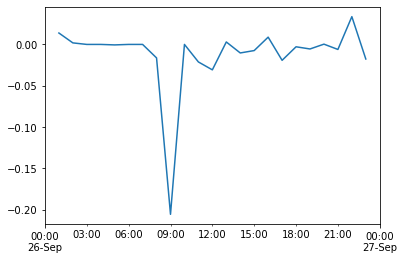

In [57]:
weighted_ret = ts * ret_df
weighted_ret['UNI'].plot()

In [ ]:
ts = pd.DataFrame(np.where(trading_signals=="BTO", 1, np.where(trading_signals=="STO", -1, 0)), index=trading_signals.index, columns=trading_signals.columns)

open_positions={}
closed_positions = {}
df = pd.DataFrame()
for i,j in enumerate(trading_signals.index):
    current_line = trading_signals.iloc[i].copy(deep=True)
    previous_signal = trading_signals.iloc[i-1].copy(deep=True)

    ret_df = get_ret(arb.prices_df, previous_signal.name, current_line.name)
    ret_df = ret_df.loc[:, current_signal.index]

    for ticker in current_line.index:
        if ticker in open_positions:
            if i == 0:
                current_line_applied = current_line[ticker].apply(lambda x: 1 if x == "BTO" else (-1 if x == "STO" else 0))
                previous_signal_value = current_line_applied
                open_positions = current_line_applied[current_line_applied.isin([-1, 1])].to_dict()

            else:
                previous_signal = trading_signals.iloc[i-1].copy(deep=True)
                current_line_applied = current_line.apply(map_signal_to_trade, previous_signal=previous_signal[ticker], previous_signal_value=previous_signal_value[ticker])
                previous_signal_value = current_line_applied
        else:
            if i == 0:
                current_line_applied = current_line.apply(lambda x: 1 if x == "BTO" else (-1 if x == "STO" else 0))
                previous_signal_value = current_line_applied
                open_positions = current_line_applied[current_line_applied.isin([-1, 1])].to_dict()

            else:
                previous_signal = trading_signals.iloc[i-1].copy(deep=True)
                current_line_applied = current_line.apply(map_signal_to_trade, previous_signal=previous_signal[ticker], previous_signal_value=previous_signal_value[ticker])
                previous_signal_value = current_line_applied

In [33]:
current_line_applied@

BTC      0
BNB      0
XRP      0
SOL      0
DOGE     0
LINK    -1
UNI     -1
LTC      0
BCH      0
MATIC    0
FTT     -1
TRX     -1
AXS      0
SHIB     0
AAVE    -1
OKB      1
GRT     -1
FTM      0
CEL      0
MKR      0
COMP     0
SUSHI   -1
SNX      0
HT       1
CHZ      0
OMG      0
ENJ      0
YFI     -1
SRM      0
BAT      0
CRV      0
REN     -1
AUDIO    1
BNT     -1
ZRX      0
DYDX     0
RAY      0
PERP     0
SAND     0
C98      0
CRO      0
HNT      0
Name: 2021-09-26 00:00:00, dtype: int64

In [15]:
current_line_applied = current_line.apply(lambda x: 1 if x == "BTO" else (-1 if x == "STO" else 0))

In [32]:
d = current_line_applied[current_line_applied.isin([-1, 1])]
d

LINK    -1
UNI     -1
FTT     -1
TRX     -1
AAVE    -1
OKB      1
GRT     -1
SUSHI   -1
HT       1
YFI     -1
REN     -1
AUDIO    1
BNT     -1
Name: 2021-09-26 00:00:00, dtype: int64

In [24]:
d['LINK'] = {"Ticker": "LINK", "Position": d['LINK'], "Return":}

-1

In [10]:
df = pd.DataFrame()
for i,j in enumerate(trading_signals.index):
    current_line = trading_signals.iloc[i].copy(deep=True)
    if i == 0:
        current_line_applied = current_line.apply(lambda x: 1 if x == "BTO" else (-1 if x == "STO" else 0))
        previous_signal_value = current_line_applied
    else:
        previous_signal = trading_signals.iloc[i-1].copy(deep=True)
        current_line_applied = current_line.apply(map_signal_to_trade, previous_signal=previous_signal, previous_signal_value=previous_signal_value)
        previous_signal_value = current_line_applied

    df.loc[j, current_line_applied.index] = current_line_applied

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

,1INCH,AAVE,AGLD,ALCX,ALGO,ALICE,ALPHA,AMPL,APE,ASD,...,TRU,TRX,TRYB,UNI,WAVES,XAUT,XRP,YFI,YFII,ZRX
startTime,,,,,,,,,,,,,,,,,,,,,
2021-09-26,-0.001323,-0.005222,-0.017925,-0.002537,NaN,-0.002271,-0.002985,0.002987,NaN,0.002552,...,-0.006105,-0.002424,0.000713,-0.002357,0.000824,-0.006935,0.001277,-0.00132,-0.000929,0.00443


In [17]:
current_line_applied.to_dict()

{'BTC': 0,
 'BNB': 0,
 'XRP': 0,
 'SOL': 0,
 'DOGE': 0,
 'LINK': -1,
 'UNI': -1,
 'LTC': 0,
 'BCH': 0,
 'MATIC': 0,
 'FTT': -1,
 'TRX': -1,
 'AXS': 0,
 'SHIB': 0,
 'AAVE': -1,
 'OKB': 1,
 'GRT': -1,
 'FTM': 0,
 'CEL': 0,
 'MKR': 0,
 'COMP': 0,
 'SUSHI': -1,
 'SNX': 0,
 'HT': 1,
 'CHZ': 0,
 'OMG': 0,
 'ENJ': 0,
 'YFI': -1,
 'SRM': 0,
 'BAT': 0,
 'CRV': 0,
 'REN': -1,
 'AUDIO': 1,
 'BNT': -1,
 'ZRX': 0,
 'DYDX': 0,
 'RAY': 0,
 'PERP': 0,
 'SAND': 0,
 'C98': 0,
 'CRO': 0,
 'HNT': 0}